##  A Novel Text Mining Approach Based on TF-IDF and Support Vector Machine for News Classification

## Let's start working on the BBC dataset

In [1]:
import pandas as pd
import os

subfolders = ['business', 'entertainment', 'politics', 'sport', 'tech']
documents = []
labels = []

for subfolder in subfolders:
    folder_path = os.path.join('/Users/Downloads/Projet-nlp/bbc', subfolder)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            data = file.read().replace('\n', '')
            documents.append(data)
            labels.append(subfolder)

df = pd.DataFrame({
    'document': documents,
    'label': labels
})


In [2]:
df

,document,label
0,UK economy facing 'major risks'The UK manufact...,business
1,Aids and climate top Davos agendaClimate chang...,business
2,Asian quake hits European sharesShares in Euro...,business
3,India power shares jump on debutShares in Indi...,business
4,Lacroix label bought by US firmLuxury goods gr...,business
...,...,...
2220,Warning over Windows Word filesWriting a Micro...,tech
2221,Fast lifts rise into record booksTwo high-spee...,tech
2222,Nintendo adds media playing to DSNintendo is r...,tech
2223,Fast moving phone viruses appearSecurity firms...,tech


In [3]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Downloading the "punkt" tokenizer
nltk.download('punkt')
# Downloading "wordnet" for lemmatization
nltk.download('wordnet')
# Downloading the list of stopwords
nltk.download('stopwords')

# Creating the lemmatizer
lemmatizer = WordNetLemmatizer()

# Creating the set of English stopwords
stop_words = set(stopwords.words('english'))

# Definition of the text preprocessing function
def preprocess_text(text):
    # Converting to lowercase
    text = text.lower()

    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    word_tokens = word_tokenize(text)

    # Removing stopwords and lemmatization
    text = [lemmatizer.lemmatize(word) for word in word_tokens if word not in stop_words]
    
    return ' '.join(text)

# Applying the preprocessing to the 'document' column of the DataFrame
df['document'] = df['document'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /Users/oussama/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/oussama/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oussama/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df

,document,label
0,uk economy facing major risksthe uk manufactur...,business
1,aid climate top davos agendaclimate change fig...,business
2,asian quake hit european sharesshares europe l...,business
3,india power share jump debutshares india large...,business
4,lacroix label bought u firmluxury good group l...,business
...,...,...
2220,warning window word fileswriting microsoft wor...,tech
2221,fast lift rise record bookstwo highspeed lift ...,tech
2222,nintendo add medium playing dsnintendo releasi...,tech
2223,fast moving phone virus appearsecurity firm wa...,tech


## TRAIN/TEST SPLIT

In [6]:
# Divide into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
train_df

,document,label
1490,jones medal must go guiltyworld antidoping age...,sport
2001,briton growing digitally obesegadget lover hun...,tech
1572,wenger step rowarsene wenger stepped feud sir ...,sport
1840,domain system scam feara system make easier cr...,tech
610,lopez miss uk charity premierejennifer lopez c...,entertainment
...,...,...
1638,sprinter walker quits athleticsformer european...,sport
1095,eu referendum question unveiledthe question as...,politics
1130,brown outline third term visiongordon brown ou...,politics
1294,bid cut court witness stressnew target reduce ...,politics


In [8]:
test_df

,document,label
414,mcdonalds bos bell dy aged 44charlie bell stra...,business
420,diageo buy u wine firmdiageo world biggest spi...,business
1644,mourinho escape fa chargechelsea bos jose mour...,sport
416,astrazeneca hit drug failureshares angloswedis...,business
1232,sport betting rule spotlighta group mp peer ca...,politics
...,...,...
741,eminem beat elvis number onerapper eminem deni...,entertainment
205,japan narrowly escape recessionjapans economy ...,business
1102,kennedy question trust blairlib dem leader cha...,politics
668,sideways dominates spirit awardsthe comedy sid...,entertainment


## TF-IDF Based Feature Extraction


In [9]:
# Importing the TfidfVectorizer class from sklearn.feature_extraction.text
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating an instance of TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fitting the vectorizer on the training data and transforming the training data
X_train = vectorizer.fit_transform(train_df['document'])

# Transforming the test data
X_test = vectorizer.transform(test_df['document'])

# The targets (labels)
y_train = train_df['label']
y_test = test_df['label']


In [79]:
X_train.shape

(1780, 34196)

In [80]:
y_train

1490            sport
2001             tech
1572            sport
1840             tech
610     entertainment
            ...      
1638            sport
1095         politics
1130         politics
1294         politics
860     entertainment
Name: label, Length: 1780, dtype: object

In [81]:
y_test

414          business
420          business
1644            sport
416          business
1232         politics
            ...      
741     entertainment
205          business
1102         politics
668     entertainment
479          business
Name: label, Length: 445, dtype: object

## Classification with SVM

In [10]:
# Importing the SVC class from sklearn.svm and evaluation functions
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initializing the SVM classifier
classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Training the SVM model
classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = classifier.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Displaying the evaluation metrics
print(f"Precision: {precision}")
print(f"Rappel: {recall}")
print(f"F-mesure: {f1}")


Précision : 0.9867196473938047
Rappel : 0.9865168539325843
F-mesure : 0.986520598550504


In [11]:
# Importing the classification_report function from sklearn.metrics
from sklearn.metrics import classification_report

# Generating the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Converting the report to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Displaying the DataFrame with F1 scores for each class
print(df_report)


               precision    recall  f1-score     support
business        0.974359  0.991304  0.982759  115.000000
entertainment   1.000000  0.958333  0.978723   72.000000
politics        0.961039  0.973684  0.967320   76.000000
sport           1.000000  1.000000  1.000000  102.000000
tech            1.000000  1.000000  1.000000   80.000000
accuracy        0.986517  0.986517  0.986517    0.986517
macro avg       0.987080  0.984664  0.985760  445.000000
weighted avg    0.986720  0.986517  0.986521  445.000000


## Prediction and Analysis

In [35]:
# Extracting 5 samples from the test data
sample_test_documents = test_df['document'].iloc[:5]
sample_test_labels = test_df['label'].iloc[:5]

# Transforming the samples into TF-IDF vectors
sample_test_vectors = vectorizer.transform(sample_test_documents)

# Making predictions on the samples
sample_predictions = classifier.predict(sample_test_vectors)

# Displaying the actual and predicted labels
for i in range(len(sample_test_labels)):
    print(f"Document: {sample_test_documents.iloc[i][:100]}...")  # Displaying the first 100 characters
    print(f"Actual Label: {sample_test_labels.iloc[i]}")
    print(f"Predicted Label: {sample_predictions[i]}")
    print("\n")


Document: mcdonalds bos bell dy aged 44charlie bell straighttalking former head fastfood giant mcdonalds died ...
Actual label: business
Predicted label: business


Document: diageo buy u wine firmdiageo world biggest spirit company agreed buy californian wine company chalon...
Actual label: business
Predicted label: business


Document: mourinho escape fa chargechelsea bos jose mourinho face football association action comment made car...
Actual label: sport
Predicted label: sport


Document: astrazeneca hit drug failureshares angloswedish drug closed 8 uk trade failure iressa drug major cli...
Actual label: business
Predicted label: business


Document: sport betting rule spotlighta group mp peer called tightening regulation controlling betting sportth...
Actual label: politics
Predicted label: business




###  Confusion matrix

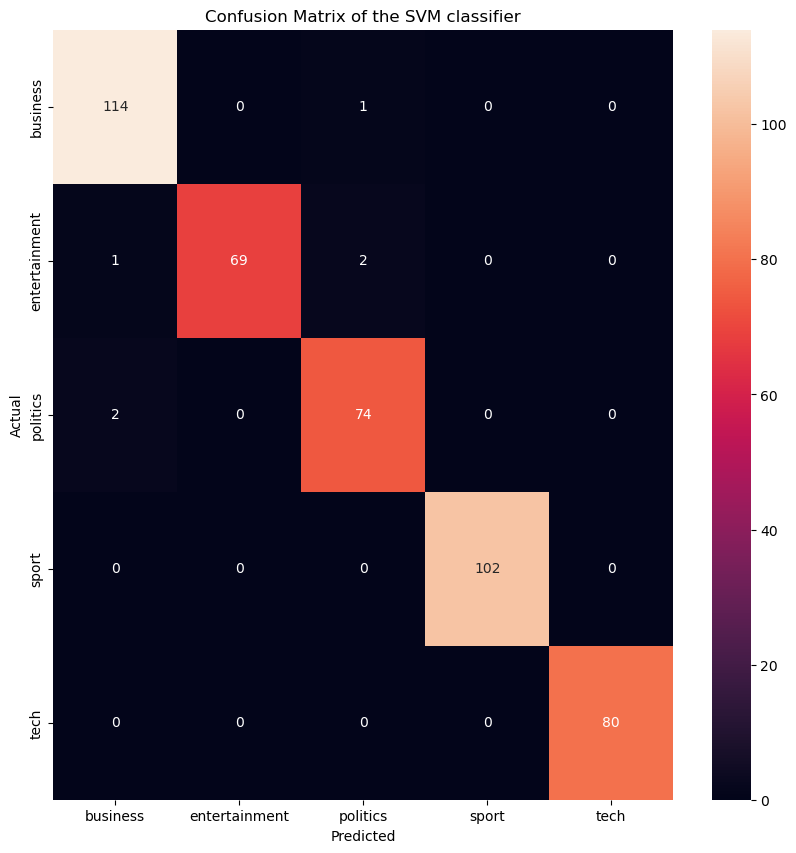

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=subfolders, yticklabels=subfolders)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the SVM classifier')
plt.show()


# Now we are working on the 20 Newsgroups dataset.

In [12]:
import os
import glob
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
subfolders = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x',
              'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med',
              'sci.space', 'misc.forsale', 'talk.politics.misc', 'talk.politics.guns', 'talk.politics.mideast', 'talk.religion.misc',
              'alt.atheism', 'soc.religion.christian']
documents = []
labels = []

for subfolder in subfolders:
    folder_path = os.path.join('/Users/Documents/projet-nlp/20_newsgroups', subfolder)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                data = preprocess_text(file.read().replace('\n', ''))
                if data:  # Check if data is not empty
                    documents.append(data)
                    labels.append(subfolder)
        except UnicodeDecodeError:
            with open(file_path, 'r', encoding='ISO-8859-1') as file:
                data = preprocess_text(file.read().replace('\n', ''))
                if data:  # Check if data is not empty
                    documents.append(data)
                    labels.append(subfolder)

df = pd.DataFrame({
    'document': documents,
    'label': labels
})


In [52]:
df

,document,label
0,newsgroups compgraphicspath cantaloupesrvcscmu...,comp.graphics
1,newsgroups compgraphicspath cantaloupesrvcscmu...,comp.graphics
2,path cantaloupesrvcscmuedurochesterudelbogussu...,comp.graphics
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,comp.graphics
4,path cantaloupesrvcscmuedudasnewsharvardedunoc...,comp.graphics
...,...,...
19992,xref cantaloupesrvcscmuedu socreligionchristia...,soc.religion.christian
19993,xref cantaloupesrvcscmuedu socreligionchristia...,soc.religion.christian
19994,path cantaloupesrvcscmuedurochesterudelgatechr...,soc.religion.christian
19995,xref cantaloupesrvcscmuedu socreligionchristia...,soc.religion.christian


In [53]:
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

import nltk

# Download necessary resources for tokenization
nltk.download('punkt')

# Download necessary resources for lemmatization
nltk.download('wordnet')

# Download necessary resources for stopwords
nltk.download('stopwords')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Initialize the stop words
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert the text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the text into words
    word_tokens = word_tokenize(text)

    # Lemmatize the words and remove stop words
    text = [lemmatizer.lemmatize(word) for word in word_tokens if word not in stop_words]

    # Return the preprocessed text as a string
    return ' '.join(text)


# Apply preprocessing to the 'document' column
df['document'] = df['document'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /Users/oussama/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/oussama/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oussama/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
df

,document,label
0,newsgroups compgraphicspath cantaloupesrvcscmu...,comp.graphics
1,newsgroups compgraphicspath cantaloupesrvcscmu...,comp.graphics
2,path cantaloupesrvcscmuedurochesterudelbogussu...,comp.graphics
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,comp.graphics
4,path cantaloupesrvcscmuedudasnewsharvardedunoc...,comp.graphics
...,...,...
19992,xref cantaloupesrvcscmuedu socreligionchristia...,soc.religion.christian
19993,xref cantaloupesrvcscmuedu socreligionchristia...,soc.religion.christian
19994,path cantaloupesrvcscmuedurochesterudelgatechr...,soc.religion.christian
19995,xref cantaloupesrvcscmuedu socreligionchristia...,soc.religion.christian


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(df['document'], df['label'], test_size=0.2, random_state=42)

In [57]:
# Vectorize the data with TF-IDF

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

                          precision    recall  f1-score   support

             alt.atheism       0.82      0.73      0.77       199
           comp.graphics       0.88      0.95      0.92       173
 comp.os.ms-windows.misc       0.91      0.96      0.94       179
comp.sys.ibm.pc.hardware       0.96      0.93      0.94       226
   comp.sys.mac.hardware       0.98      0.95      0.96       204
          comp.windows.x       0.99      0.97      0.98       205
            misc.forsale       0.89      0.94      0.91       196
               rec.autos       0.97      0.98      0.97       186
         rec.motorcycles       1.00      0.97      0.99       190
      rec.sport.baseball       1.00      1.00      1.00       203
        rec.sport.hockey       1.00      0.99      1.00       218
               sci.crypt       0.98      0.97      0.98       192
         sci.electronics       0.95      0.95      0.95       203
                 sci.med       0.98      0.97      0.98       200
         

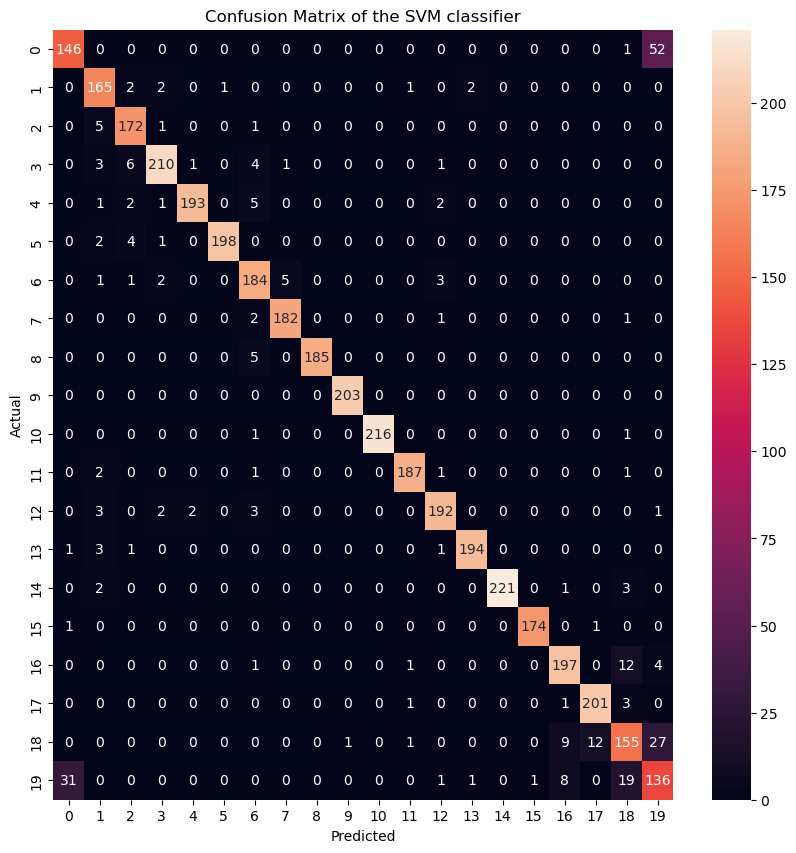

In [58]:
# Train an SVM model
classifier = svm.SVC(kernel='linear', C=1.0, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Calculate evaluation metrics
report = classification_report(y_test, y_pred)
print(report)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the SVM classifier')
plt.show()

In [59]:
# Generate a classification report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
alt.atheism,0.815642,0.733668,0.772487,199.00000
comp.graphics,0.882353,0.953757,0.916667,173.00000
comp.os.ms-windows.misc,0.914894,0.960894,0.937330,179.00000
comp.sys.ibm.pc.hardware,0.958904,0.929204,0.943820,226.00000
comp.sys.mac.hardware,0.984694,0.946078,0.965000,204.00000
comp.windows.x,0.994975,0.965854,0.980198,205.00000
misc.forsale,0.888889,0.938776,0.913151,196.00000
rec.autos,0.968085,0.978495,0.973262,186.00000
rec.motorcycles,1.000000,0.973684,0.986667,190.00000
rec.sport.baseball,0.995098,1.000000,0.997543,203.00000


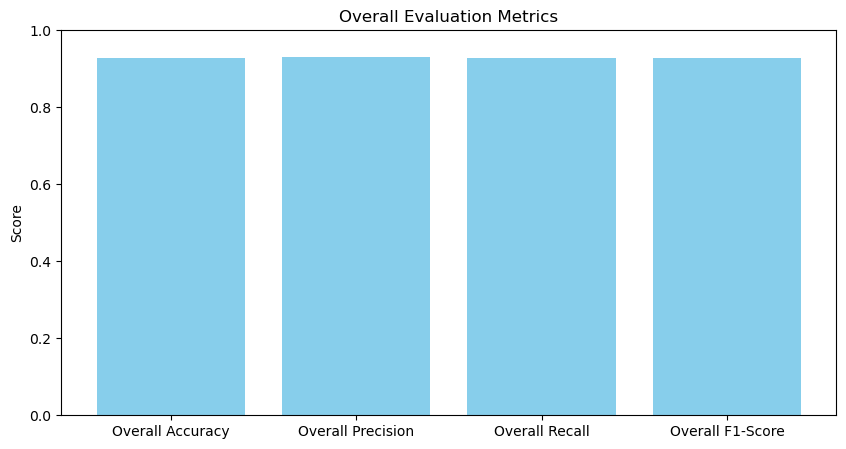

In [68]:
import matplotlib.pyplot as plt

# Metrics in a dictionary
overall_metrics = {
    'Overall Accuracy': overall_accuracy,
    'Overall Precision': overall_precision,
    'Overall Recall': overall_recall,
    'Overall F1-Score': overall_f1
}

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.bar(overall_metrics.keys(), overall_metrics.values(), color='skyblue')
plt.title('Overall Evaluation Metrics')
plt.ylabel('Score')
plt.ylim([0.0, 1.0])  # to make y-axis start from 0 and end at 1
plt.show()

In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Overall precision and recall
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')

# Overall F1-score and accuracy
overall_f1 = f1_score(y_test, y_pred, average='weighted')
overall_accuracy = accuracy_score(y_test, y_pred)

# Constructing a DataFrame
overall_metrics = pd.DataFrame({
    'Overall Accuracy': [overall_accuracy],
    'Overall Precision': [overall_precision],
    'Overall Recall': [overall_recall],
    'Overall F1-Score': [overall_f1]
})

print(overall_metrics)


   Overall Accuracy  Overall Precision  Overall Recall  Overall F1-Score
0           0.92775           0.929482         0.92775          0.928184


In [63]:
import numpy as np
# Select a random example from the test set
random_index = np.random.choice(X_test.shape[0])
test_example = X_test[random_index]
test_label = y_test.iloc[random_index]

# Use the SVM classifier to predict the label of the test text
test_example_pred = classifier.predict(test_example)

print(f"Original label: {test_label}")
print(f"Predicted label: {test_example_pred[0]}")

Original label: misc.forsale
Predicted label: misc.forsale
